In [1]:
import os
os.getcwd()

'C:\\Users\\Chimay Dani'

In [2]:
os.chdir('D:\MBA_DSDA_Sem-3_Files\Summer Internship\Guided Projects\GP1_Electricity_Load_Type_Prediction')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Chimay Dani\AppData\Local\Temp\ipykernel_8892\3127880142.py:1: SyntaxWarning: invalid escape sequence '\M'
  os.chdir('D:\MBA_DSDA_Sem-3_Files\Summer Internship\Guided Projects\GP1_Electricity_Load_Type_Prediction')


In [3]:
os.getcwd()

'D:\\MBA_DSDA_Sem-3_Files\\Summer Internship\\Guided Projects\\GP1_Electricity_Load_Type_Prediction'

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\MBA_DSDA_Sem-3_Files\Summer Internship\Guided Projects\GP1_Electricity_Load_Type_Prediction\Steel_industry_data.csv')


<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Chimay Dani\AppData\Local\Temp\ipykernel_8892\2341475170.py:4: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv('D:\MBA_DSDA_Sem-3_Files\Summer Internship\Guided Projects\GP1_Electricity_Load_Type_Prediction\Steel_industry_data.csv')


# 1.Understanding the Data & Summary Statistics

In [5]:
# Display the first few rows
print(data.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [6]:
#Rename the columns
new_column_names = [
    'Date_Time', 'Usage_kWh', 'LagC_RP',
    'LeadC_RP', 'CO2_tons', 'LagC_PF',
    'LeadC_PF', 'NSM', 'Week_Status', 'Day_of_Week', 'Load_Type'
]

data.columns = new_column_names
data.head()

,Date_Time,Usage_kWh,LagC_RP,LeadC_RP,CO2_tons,LagC_PF,LeadC_PF,NSM,Week_Status,Day_of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
# Display the summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date_Time    35040 non-null  object 
 1   Usage_kWh    35040 non-null  float64
 2   LagC_RP      35040 non-null  float64
 3   LeadC_RP     35040 non-null  float64
 4   CO2_tons     35040 non-null  float64
 5   LagC_PF      35040 non-null  float64
 6   LeadC_PF     35040 non-null  float64
 7   NSM          35040 non-null  int64  
 8   Week_Status  35040 non-null  object 
 9   Day_of_Week  35040 non-null  object 
 10  Load_Type    35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB
None


In [8]:
# Display basic statistics for numeric columns
print(data.describe())

          Usage_kWh       LagC_RP      LeadC_RP      CO2_tons       LagC_PF  \
count  35040.000000  35040.000000  35040.000000  35040.000000  35040.000000   
mean      27.386892     13.035384      3.870949      0.011524     80.578056   
std       33.444380     16.306000      7.424463      0.016151     18.921322   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.200000      2.300000      0.000000      0.000000     63.320000   
50%        4.570000      5.000000      0.000000      0.000000     87.960000   
75%       51.237500     22.640000      2.090000      0.020000     99.022500   
max      157.180000     96.910000     27.760000      0.070000    100.000000   

           LeadC_PF           NSM  
count  35040.000000  35040.000000  
mean      84.367870  42750.000000  
std       30.456535  24940.534317  
min        0.000000      0.000000  
25%       99.700000  21375.000000  
50%      100.000000  42750.000000  
75%      100.000000  64125.000000  


In [9]:
# Check for missing values
print(data.isnull().sum())

Date_Time      0
Usage_kWh      0
LagC_RP        0
LeadC_RP       0
CO2_tons       0
LagC_PF        0
LeadC_PF       0
NSM            0
Week_Status    0
Day_of_Week    0
Load_Type      0
dtype: int64


# 2.Exploratory Data Analysis

### 2.1 Univariate Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

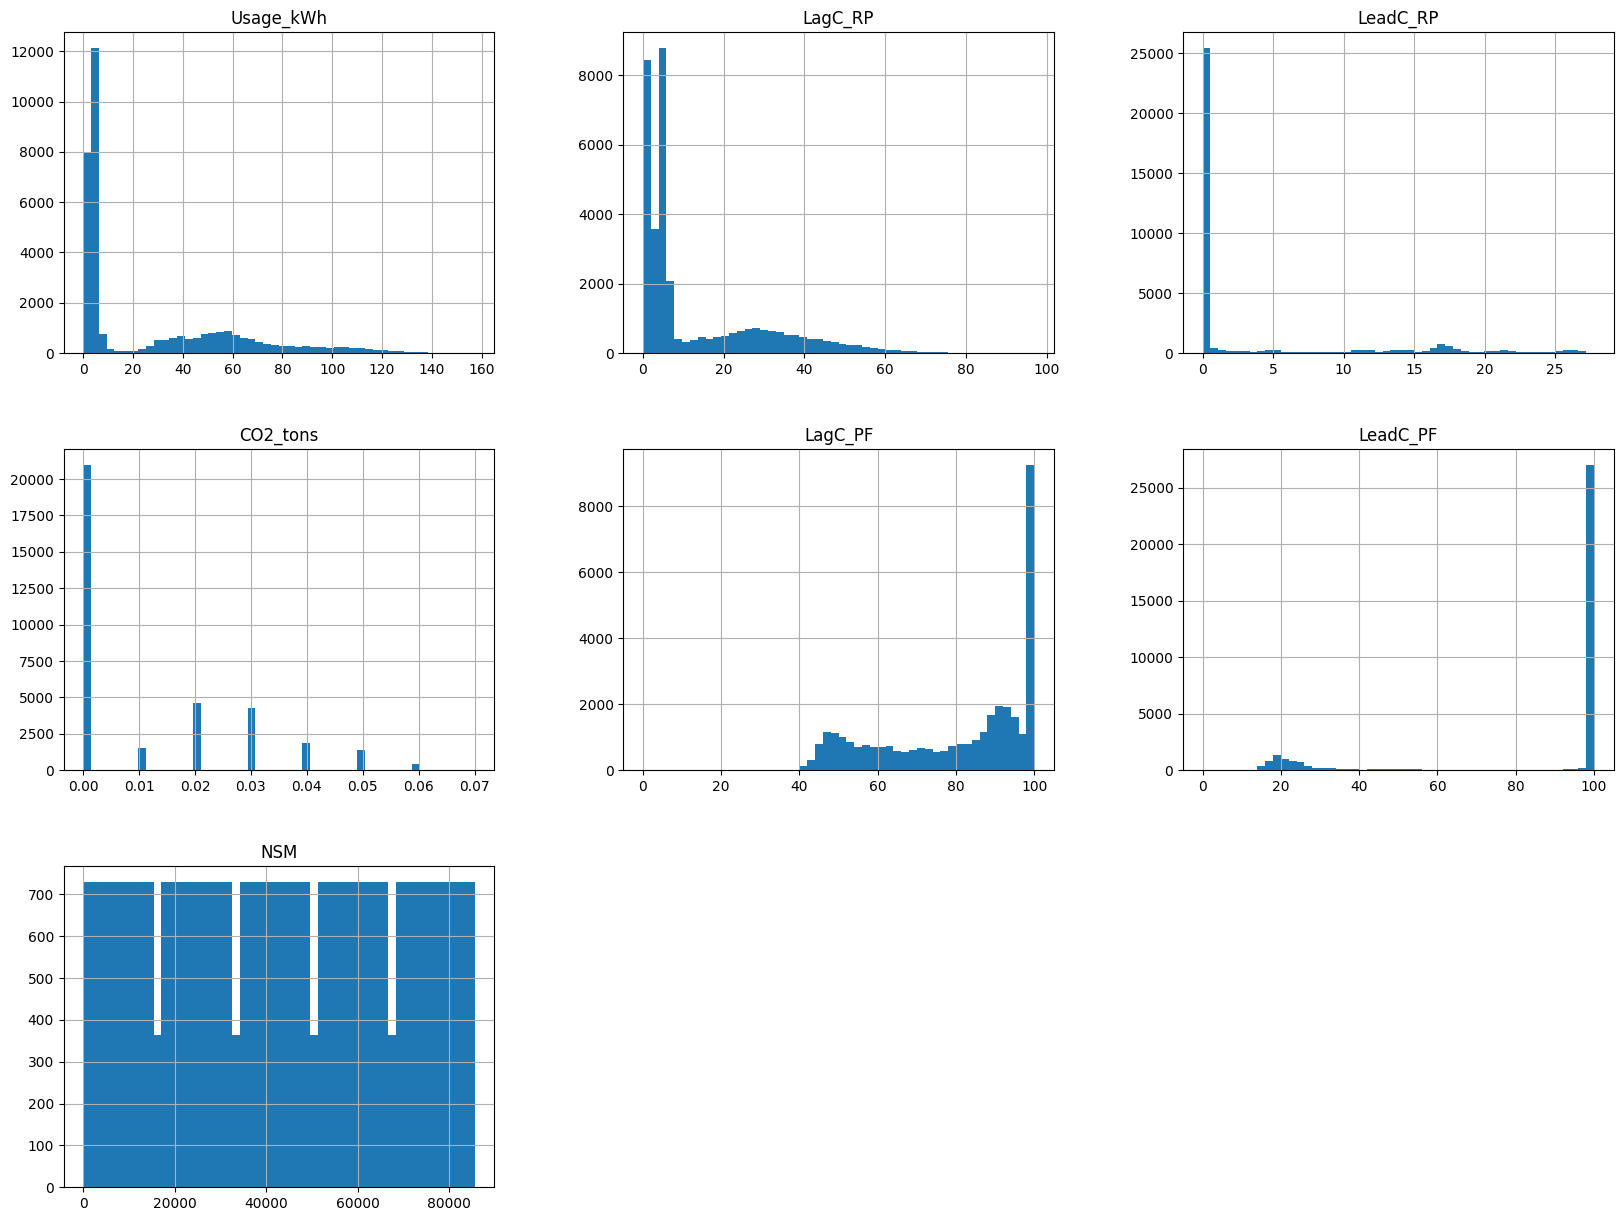

In [11]:
# Plotting the distribution of numerical features
data.hist(bins=50, figsize=(20, 15))
plt.show()

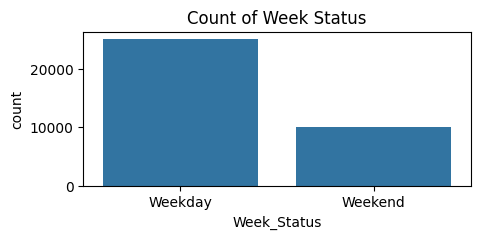

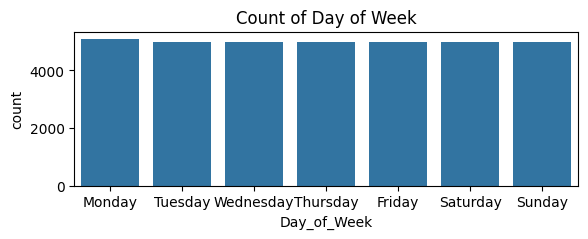

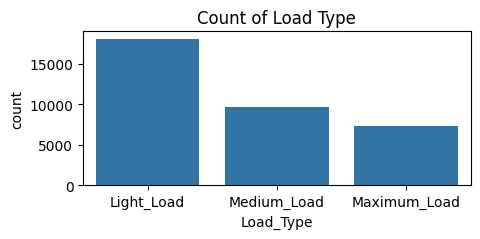

In [12]:
# Count plots for categorical variables
plt.figure(figsize=(5, 2))
sns.countplot(x='Week_Status', data=data)
plt.title('Count of Week Status')
plt.show()

plt.figure(figsize=(6.5, 2))
sns.countplot(x='Day_of_Week', data=data)
plt.title('Count of Day of Week')
plt.show()

plt.figure(figsize=(5, 2))
sns.countplot(x='Load_Type', data=data)
plt.title('Count of Load Type')
plt.show()

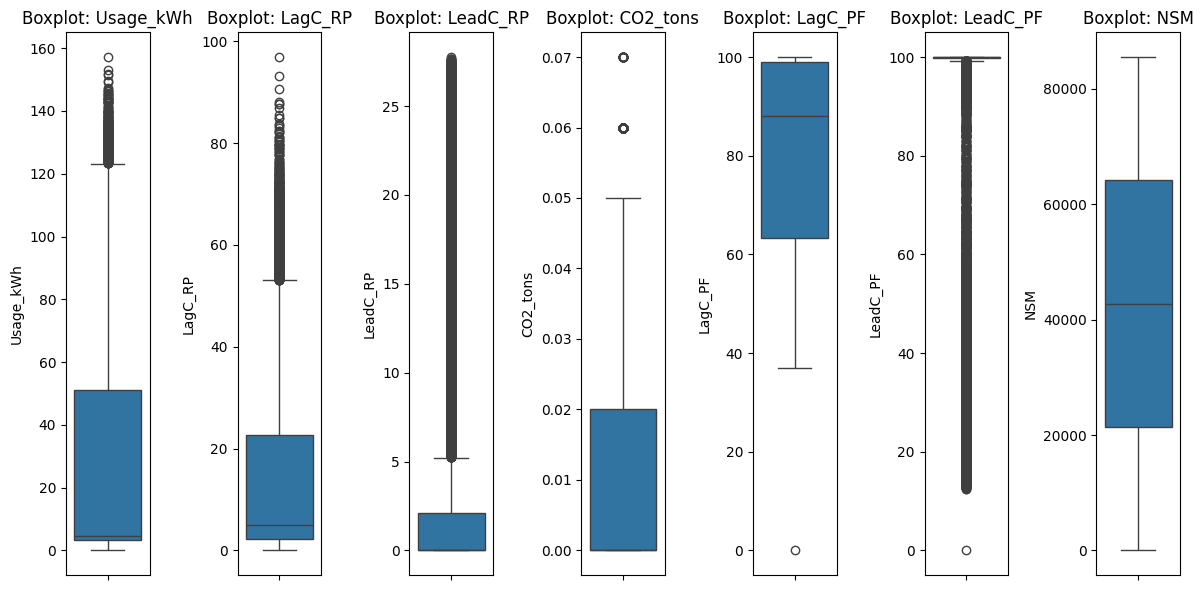

In [13]:
# Select numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for numerical columns to visualize outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot: {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

### 2.2 Bivariate Analysis

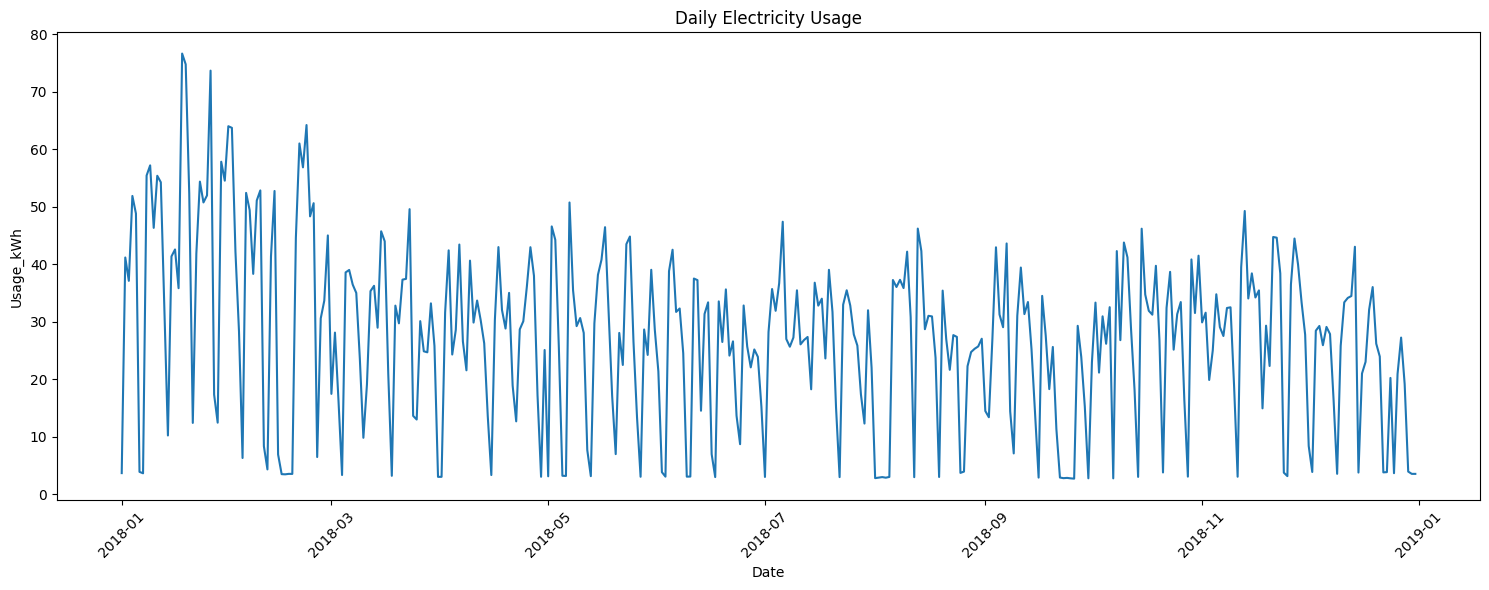

In [14]:

# Convert 'Date_Time' column to datetime type
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H:%M')

# Extract date part from 'Date_Time' column
data['Date'] = data['Date_Time'].dt.date

# Group data by date and calculate mean usage for each date
data_agg = data.groupby('Date')['Usage_kWh'].mean().reset_index()

# Plotting the aggregated usage over time
plt.figure(figsize=(15, 6))
plt.plot(data_agg['Date'], data_agg['Usage_kWh'])
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.title('Daily Electricity Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

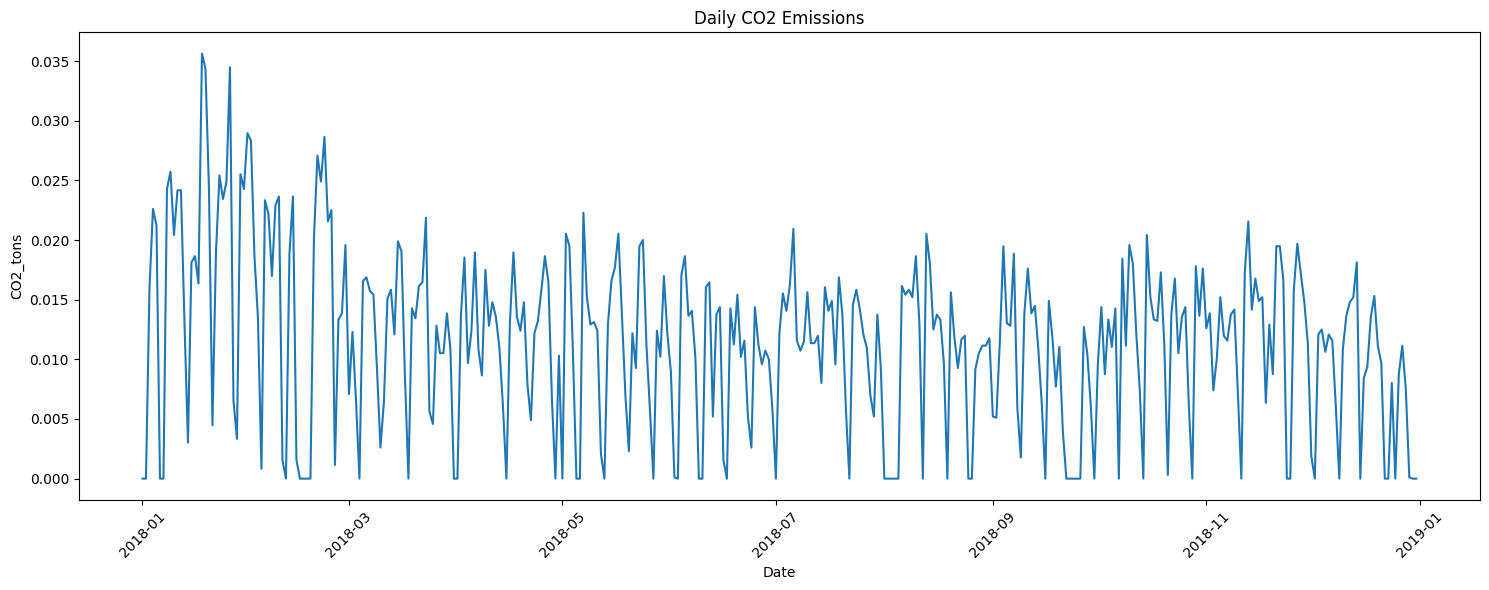

In [15]:
# Convert 'Date_Time' column to datetime type
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H:%M')

# Extract date part from 'Date_Time' column
data['Date'] = data['Date_Time'].dt.date

# Group data by date and calculate mean CO2 emissions for each date
co2_agg = data.groupby('Date')['CO2_tons'].mean().reset_index()

# Plotting the aggregated CO2 emissions over time
plt.figure(figsize=(15, 6))
plt.plot(co2_agg['Date'], co2_agg['CO2_tons'])
plt.xlabel('Date')
plt.ylabel('CO2_tons')
plt.title('Daily CO2 Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

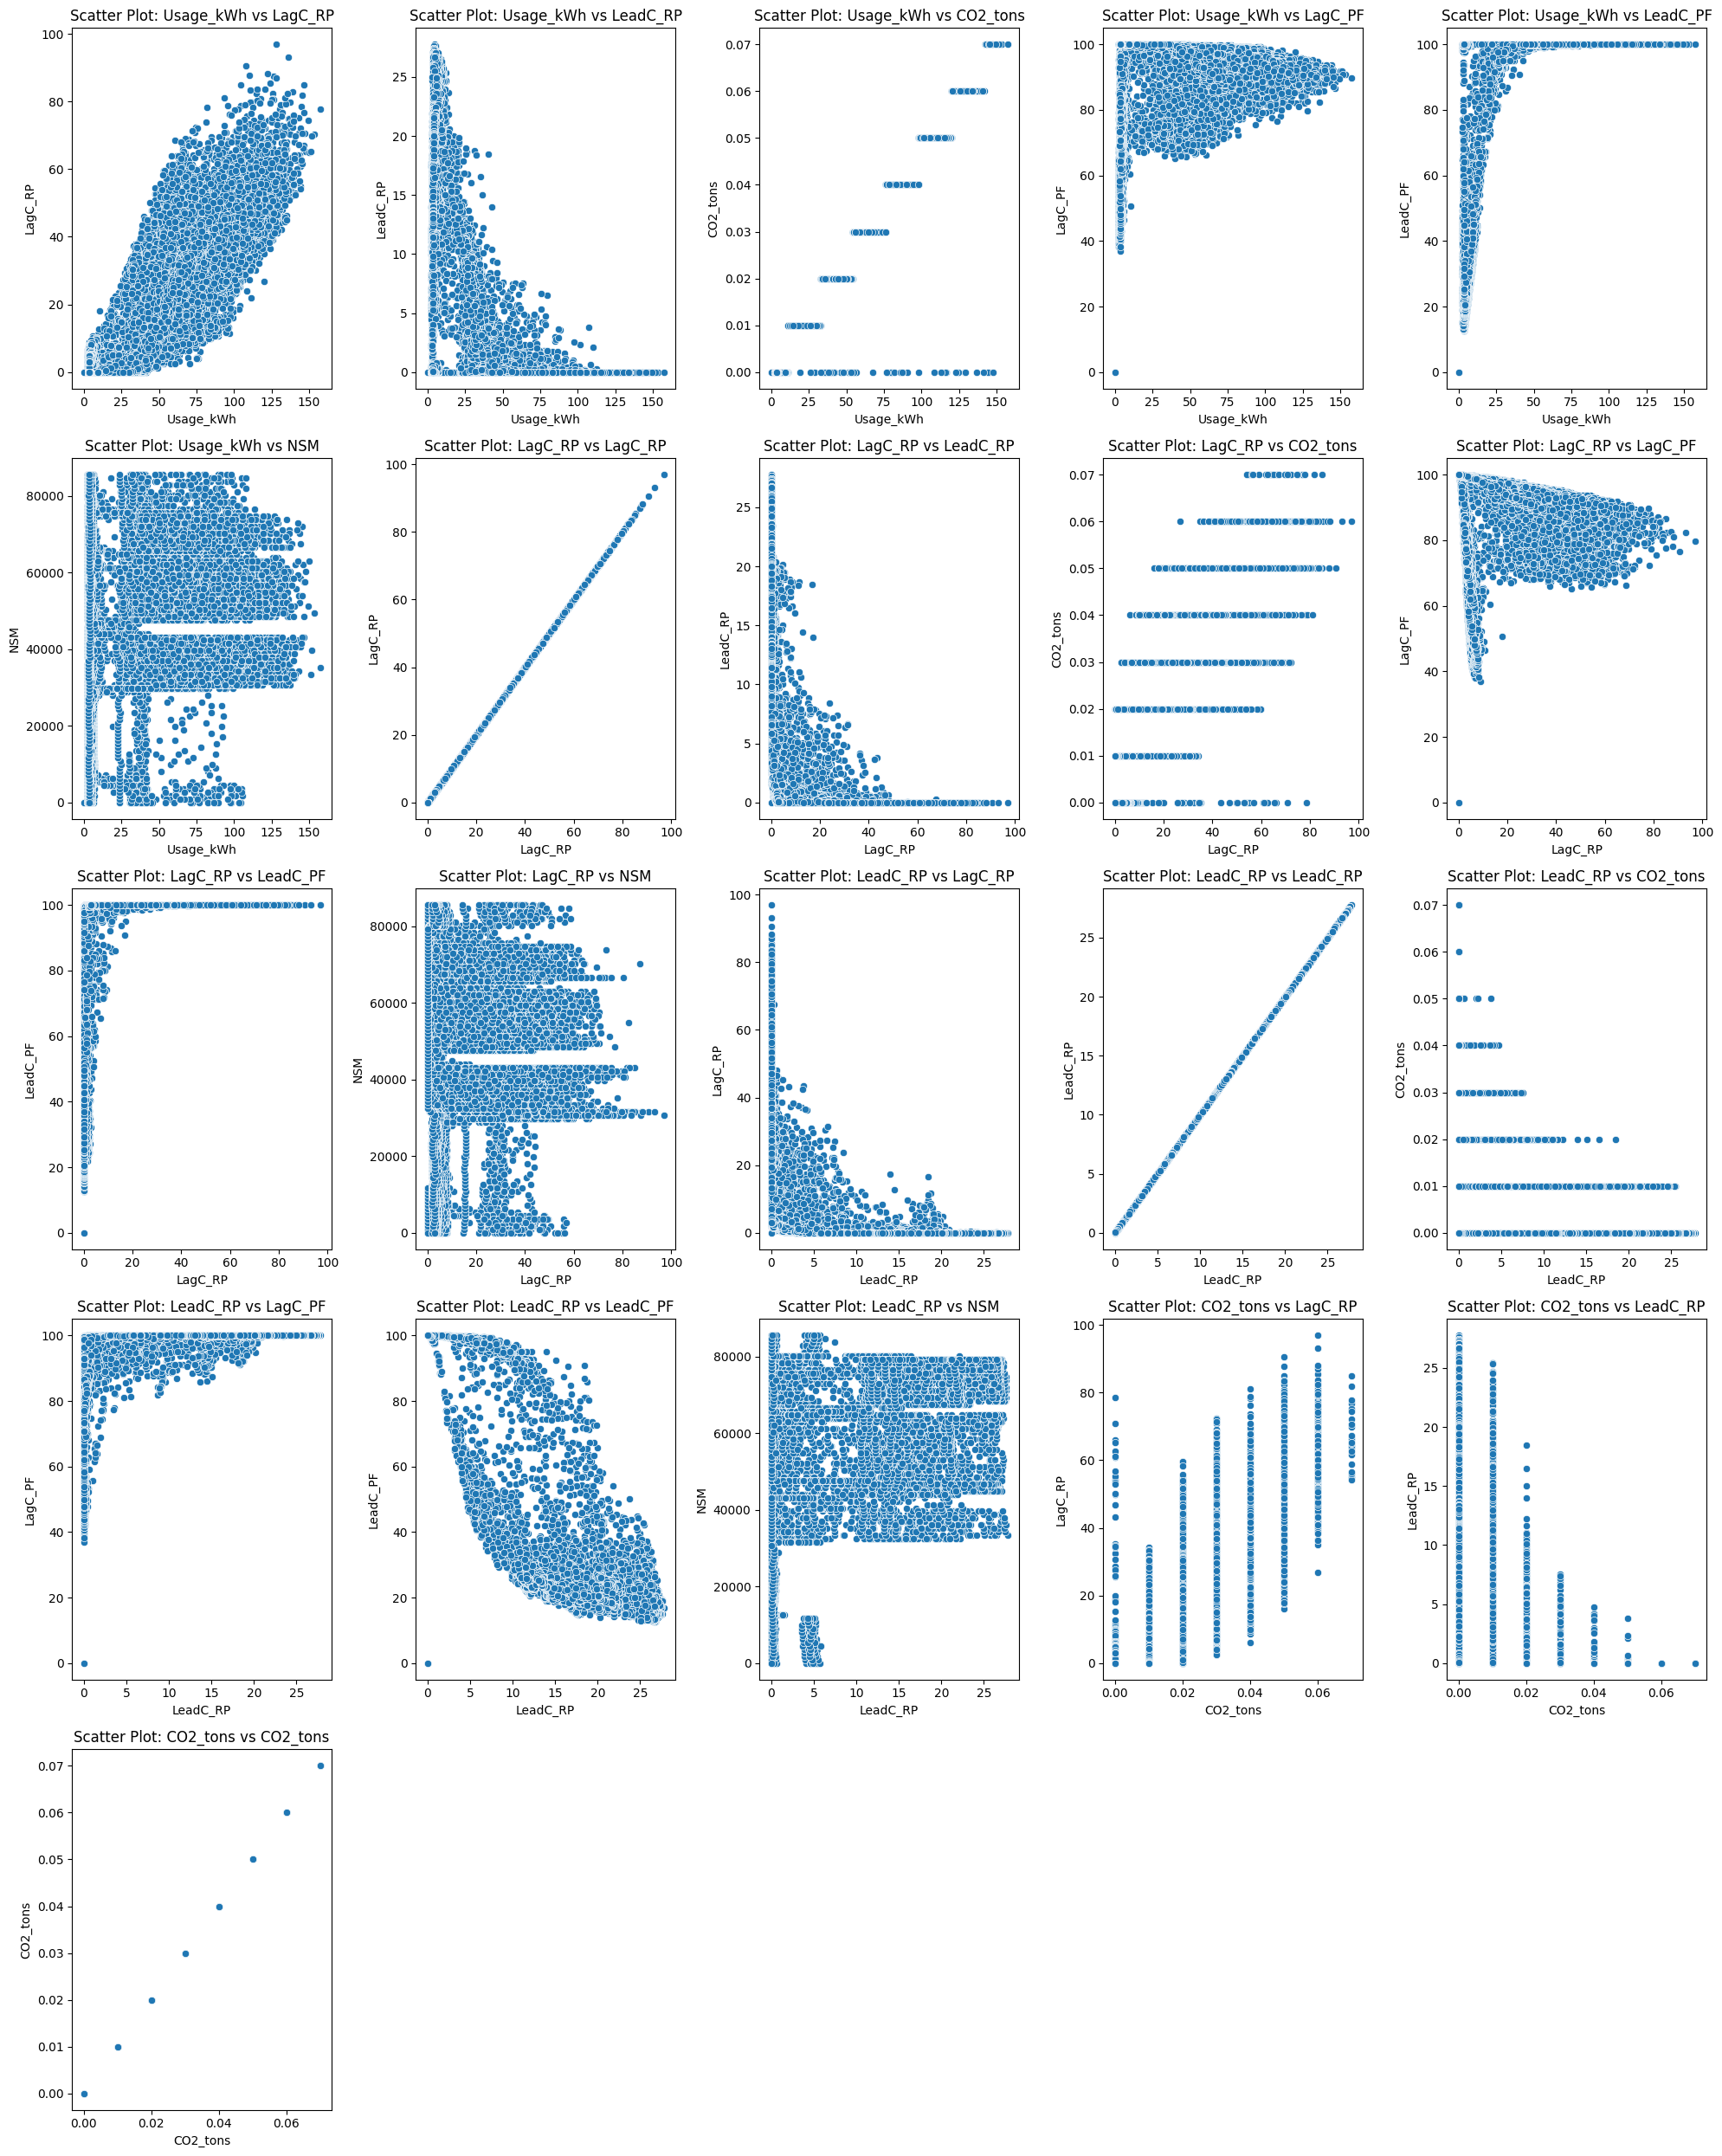

In [16]:
import math
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate number of scatter plots to create
num_plots = math.comb(len(numeric_cols), 2)

# Calculate number of rows and columns for the grid layout
num_cols_per_row = 5
num_rows = math.ceil(num_plots / num_cols_per_row)

# Create a grid layout for scatter plots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 5*num_rows))

# Plot scatter plots for all pairs of numeric columns
plot_count = 0
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        if plot_count < num_plots:
            col_x = numeric_cols[plot_count // (len(numeric_cols) - 1)]
            col_y = numeric_cols[plot_count % (len(numeric_cols) - 1) + 1]
            sns.scatterplot(x=col_x, y=col_y, data=data, ax=ax)
            ax.set_xlabel(col_x)
            ax.set_ylabel(col_y)
            ax.set_title(f'Scatter Plot: {col_x} vs {col_y}')
            plot_count += 1
        else:
            ax.axis('off')  # Turn off axis for any remaining subplots that are not needed

# Adjust layout
plt.tight_layout()
plt.show()

### 2.3 Multivariate Analysis

In [17]:
data.head()

,Date_Time,Usage_kWh,LagC_RP,LeadC_RP,CO2_tons,LagC_PF,LeadC_PF,NSM,Week_Status,Day_of_Week,Load_Type,Date
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018-01-01
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018-01-01
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,2018-01-01
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,2018-01-01
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,2018-01-01


In [18]:
#Remove the Date_Time & Date column as it won't be necessary for Classifier building
data.drop(['Date_Time', 'Date'], axis=1, inplace=True)

In [19]:
#Convert categorical variables into numerical values (Label Encoding)
# For Week_Status
data['Week_Status'] = data['Week_Status'].map({'Weekday': 0, 'Weekend': 1})

# For Day_of_Week
data['Day_of_Week'] = data['Day_of_Week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
})

# For Load_Type
data['Load_Type'] = data['Load_Type'].map({
    'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2
})

data.head()

,Usage_kWh,LagC_RP,LeadC_RP,CO2_tons,LagC_PF,LeadC_PF,NSM,Week_Status,Day_of_Week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,0


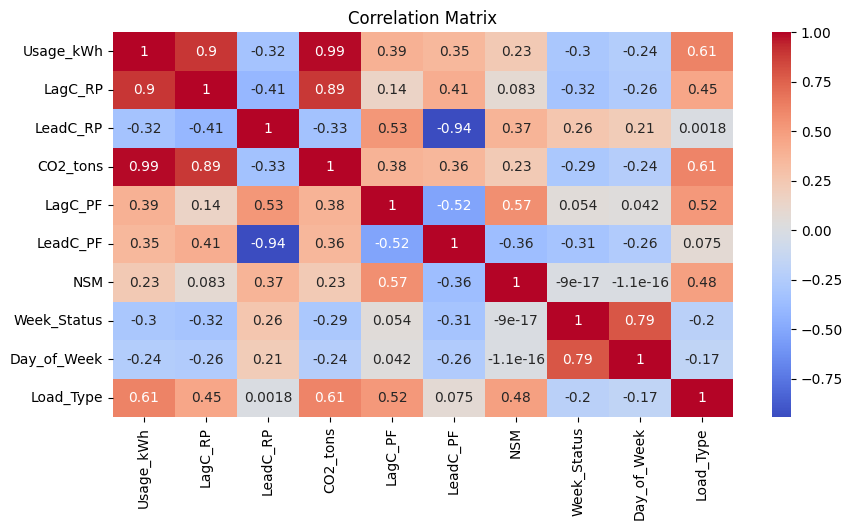

In [20]:
# Correlation matrix
corr_matrix = data.corr()
#print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Data Pre-processing for Model building

In [21]:
#Removing CO2_tons, Day_of_Week & LeadC_RP from the dataset since their contribution 
#to predicting the Load type is on the least side

data.drop(['LeadC_RP','CO2_tons','Day_of_Week'], axis=1, inplace=True)

In [22]:
#Converting Label Encodings to One-Hot Encoding:
# Convert Week_Status to one-hot encoding
week_status_onehot = pd.get_dummies(data['Week_Status'], prefix='Week_Status')


# Concatenate the one-hot encoded variables with the original DataFrame
data = pd.concat([data.drop(columns=['Week_Status']), week_status_onehot], axis=1)
data.head()

,Usage_kWh,LagC_RP,LagC_PF,LeadC_PF,NSM,Load_Type,Week_Status_0,Week_Status_1
0,3.17,2.95,73.21,100.0,900,0,True,False
1,4.00,4.46,66.77,100.0,1800,0,True,False
2,3.24,3.28,70.28,100.0,2700,0,True,False
3,3.31,3.56,68.09,100.0,3600,0,True,False
4,3.82,4.50,64.72,100.0,4500,0,True,False


In [23]:
data['Week_Status_0'] = data['Week_Status_0'].astype(int)
data['Week_Status_1'] = data['Week_Status_1'].astype(int)

In [24]:
data.isnull().sum()

Usage_kWh        0
LagC_RP          0
LagC_PF          0
LeadC_PF         0
NSM              0
Load_Type        0
Week_Status_0    0
Week_Status_1    0
dtype: int64

# 4. ML Model Building
## Task: Prediction of Load_Type from selected features of the Steel Factory Electricity Consumption Dataset

### 4.1 Importing Necessary Packages & Modules

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

### 4.2 Preparing Data as Predictors & Targets

In [26]:
X = data.drop(columns=['Load_Type'])
y = data['Load_Type']

### 4.3 Splitting data for training/testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.4 Classifiers:
### 4.4.1 Decision Tree

In [28]:
# Initialize Decision Tree classifier
decision_tree_clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifier
print("Training Decision Tree...")
decision_tree_clf.fit(X_train, y_train)

# Test Decision Tree classifier
y_pred_dt = decision_tree_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print results
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')
print(classification_report(y_test, y_pred_dt))
print('-' * 50)

Training Decision Tree...
Accuracy of Decision Tree: 0.8806
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3572
           1       0.80      0.80      0.80      1937
           2       0.79      0.79      0.79      1499

    accuracy                           0.88      7008
   macro avg       0.85      0.85      0.85      7008
weighted avg       0.88      0.88      0.88      7008

--------------------------------------------------


### 4.4.2 Random Forest Classifier

In [30]:
# Initialize Random Forest classifier
random_forest_clf = RandomForestClassifier(random_state=42)

# Train Random Forest classifier
print("Training Random Forest...")
random_forest_clf.fit(X_train, y_train)

# Test Random Forest classifier
y_pred_rf = random_forest_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf))
print('-' * 50)

Training Random Forest...
Accuracy of Random Forest: 0.8978
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3572
           1       0.83      0.82      0.82      1937
           2       0.82      0.81      0.82      1499

    accuracy                           0.90      7008
   macro avg       0.87      0.87      0.87      7008
weighted avg       0.90      0.90      0.90      7008

--------------------------------------------------


### 4.4.3 XGBoost Classifier

In [31]:
# Initialize XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Train XGBoost classifier
print("Training XGBoost...")
xgb_clf.fit(X_train, y_train)

# Test XGBoost classifier
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print results
print(f'Accuracy of XGBoost: {accuracy_xgb:.4f}')
print(classification_report(y_test, y_pred_xgb))
print('-' * 50)

Training XGBoost...
Accuracy of XGBoost: 0.8947
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3572
           1       0.83      0.80      0.82      1937
           2       0.81      0.84      0.82      1499

    accuracy                           0.89      7008
   macro avg       0.87      0.87      0.87      7008
weighted avg       0.89      0.89      0.89      7008

--------------------------------------------------


## 4.5: Result & Comparison for selecting the best model

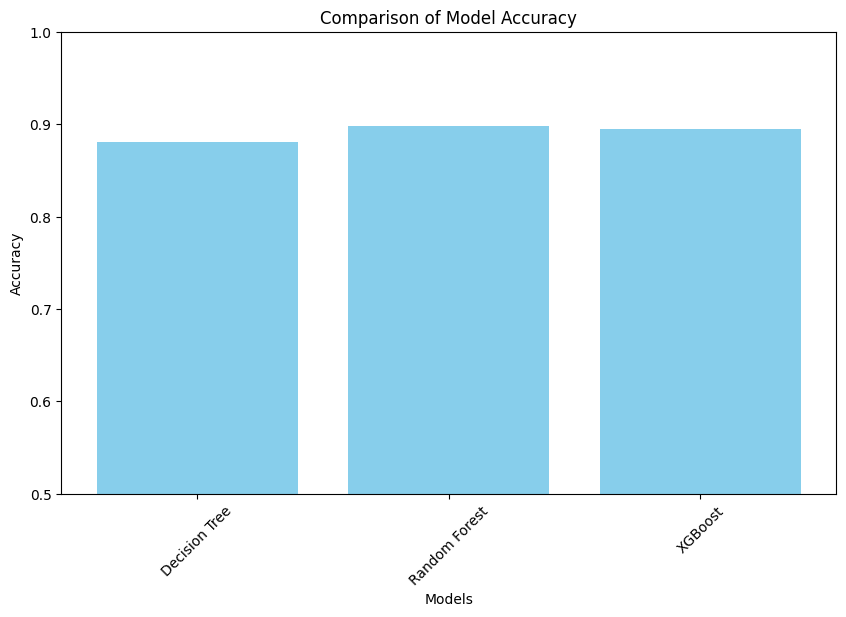

In [32]:
# Accuracy scores of all models
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_xgb]
models = ['Decision Tree', 'Random Forest', 'XGBoost']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.show()

### Trial Prediction 

In [37]:
import numpy as np
single_input = np.array([[40,    # Usage_kWh
                          1.08,     # LagC_RP
                          99.96,    # LagC_PF
                          99.71,    # LeadC_PF
                          69300,   # NSM (10 AM)
                          1,       # Week_Status_0 (Weekday)
                          0]])     # Week_Status_1 (Weekend)
# Make a prediction
prediction = random_forest_clf.predict(single_input)
print(prediction)

#Load_Type 1 => Medium Load (Correct prediction as these values are close to the actual record in the dataset)
# Dataset record: Date_Time : 16/04/2018; 19:15

[1]


D:\MBA_DSDA_Sem-3_Files\Summer Internship\Guided Projects\GP1_Electricity_Load_Type_Prediction\GP1_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 5. Saving the Random Forest Classifier for Deployment

In [33]:
# dumping the selected model
from joblib import dump
dump(random_forest_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']